<a href="https://colab.research.google.com/github/Zoha-R/Youtube_spam_comment_detection/blob/main/Youtube_Spam_Comments_Detection_Final(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Group Members**


* SUMBUL RIDA   &nbsp;&nbsp;&nbsp;    ***DS_013/2023-24***
* ZOHA RAZA     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;         ***DS_015/2023-24***
* SYEDA MARIUM HASNAIN  &nbsp;&nbsp;&nbsp;&nbsp; ***DS_001/2023-24***



In [ ]:
#merging all datasets files into one file

# import pandas as pd
# df1=pd.read_csv("Youtube01-Psy.csv")
# df2=pd.read_csv("Youtube02-KatyPerry.csv")
# df3=pd.read_csv("Youtube03-LMFAO.csv")
# df4=pd.read_csv("Youtube04-Eminem.csv")
# df5=pd.read_csv("Youtube05-Shakira.csv")
# print(df1,df2,df3,df4,df5)

# df7=pd.concat([df1,df2,df3,df4,df5],axis=0)
# print(df7)

# df7.to_csv('Youtubedata.csv', index=False)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Youtubedata.csv to Youtubedata.csv


In [ ]:
# Loading dataset
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['Youtubedata.csv']))

In [ ]:
# Importing Libraries
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   CLASS       1956 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 76.5+ KB
None
First few rows of the dataset:
                                    COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   
3          z13fwbwp1oujthgqj04chlngpvzmtt3r3dw            GsMega   
4  LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc      Jason Haddad   

                  DATE                                            CONTENT  \
0  2013-11-07T06:20:

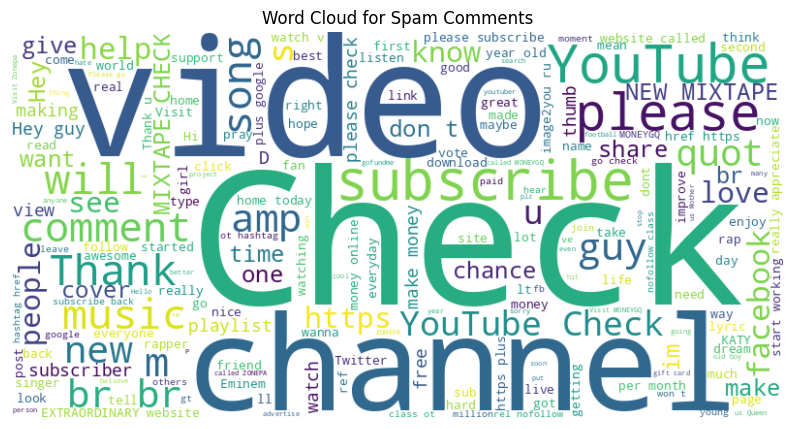

In [ ]:
#EDA
# Display basic information about the dataset
print("Dataset information:")
print(df.info())

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Count of spam values
spam_count = df['CLASS'].value_counts()
print("\nSpam Value Counts:")
print(spam_count)

# Word Cloud for spam comments
spam_comments = ' '.join(df[df['CLASS'] == 1]['CONTENT'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_comments)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Comments')
plt.axis('off')
plt.show()

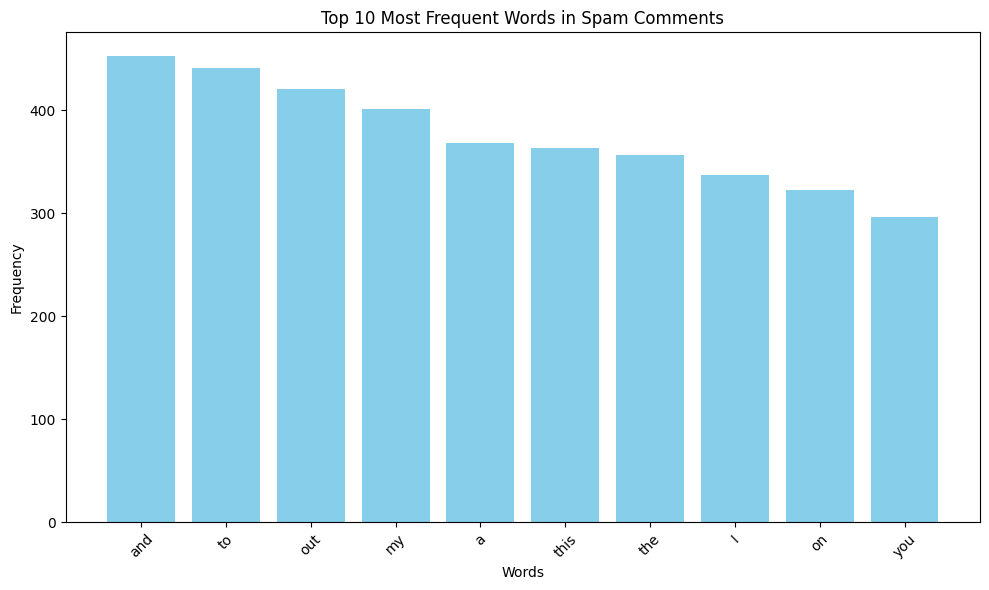

In [ ]:
# Assuming 'CONTENT' is the column name containing comments
spam_comments = ' '.join(df[df['CLASS'] == 1]['CONTENT'])

# Splitting words in spam comments
words = spam_comments.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Get top 10 most common words
top_words = word_counts.most_common(10)

# Extracting top words and their counts
top_words, top_word_counts = zip(*top_words)

# Plotting the bar graph for top 10 words
plt.figure(figsize=(10, 6))
plt.bar(top_words, top_word_counts, color='skyblue')
plt.title('Top 10 Most Frequent Words in Spam Comments')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


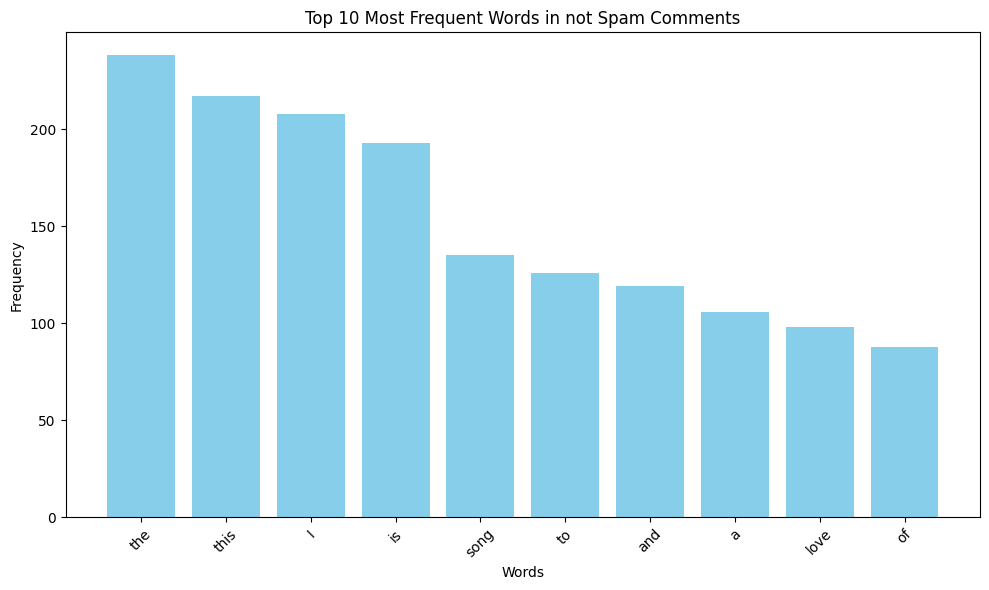

In [ ]:
# Assuming 'CONTENT' is the column name containing comments
spam_comments = ' '.join(df[df['CLASS'] == 0]['CONTENT'])

# Splitting words in spam comments
words = spam_comments.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Get top 10 most common words
top_words = word_counts.most_common(10)

# Extracting top words and their counts
top_words, top_word_counts = zip(*top_words)

# Plotting the bar graph for top 10 words
plt.figure(figsize=(10, 6))
plt.bar(top_words, top_word_counts, color='skyblue')
plt.title('Top 10 Most Frequent Words in not Spam Comments')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-8-6fe3638de0b1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["CLASS"] = df2["CLASS"].map({0: "Not Spam", 1: "Spam Comment"})


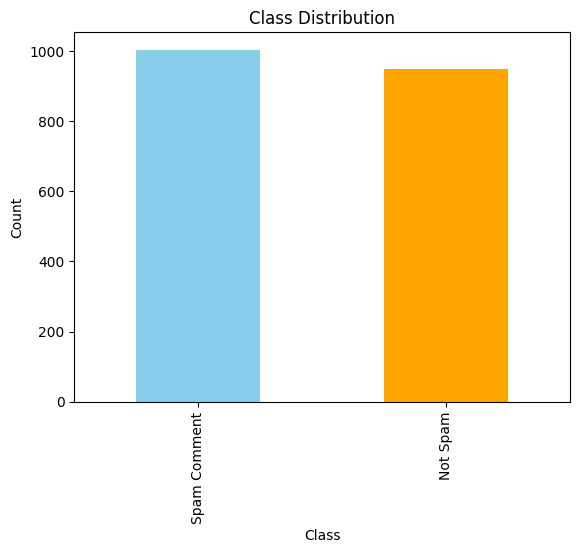

In [ ]:
# Data Preparation
df2 = df[["CONTENT", "CLASS"]]

# Replacing classes with readable names
df2["CLASS"] = df2["CLASS"].map({0: "Not Spam", 1: "Spam Comment"})

# Showing class by using bar plot
df2['CLASS'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
#showing class distribution
df['CLASS'].value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

In [ ]:
# Spliting train test data
x = np.array(df2["CONTENT"])
y = np.array(df2["CLASS"])
cv = CountVectorizer()
x = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

#class imbalance in train dataset
print(pd.Series(ytrain).value_counts())

Spam Comment    790
Not Spam        774
dtype: int64


In [ ]:
#applying data balancing technique and oversampling data using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

#train dataset after oversampling
print(pd.Series(y_resampled).value_counts())


Not Spam        790
Spam Comment    790
dtype: int64


Random Forest Score: 0.9642857142857143
Random Forest Accuracy: 0.9642857142857143
Random Forest Cross-Validation Scores: [0.93367347 0.93861893 0.95396419 0.95652174 0.91560102]
Mean Cross-Validation Score: 0.9396758703481393


['Spam Comment']
['Not Spam']
['Spam Comment']
['Not Spam']


Random Forest Confusion Matrix:


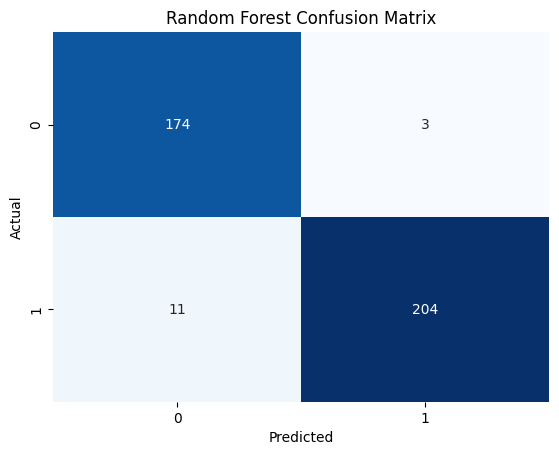



Random Forest Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.94      0.98      0.96       177
Spam Comment       0.99      0.95      0.97       215

    accuracy                           0.96       392
   macro avg       0.96      0.97      0.96       392
weighted avg       0.97      0.96      0.96       392





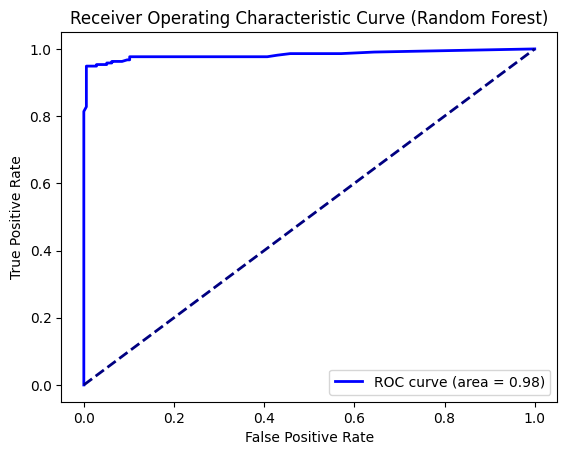

In [ ]:
# Random Forest algorithm
model_rf = RandomForestClassifier()
model_rf.fit(X_resampled, y_resampled)
print("Random Forest Score:", model_rf.score(xtest, ytest))

# Print accuracy
y_pred_rf = model_rf.predict(xtest)
print("Random Forest Accuracy:", accuracy_score(ytest, y_pred_rf))

# Print Cross-Validation Score
cv_scores_rf = cross_val_score(model_rf, x, y, cv=5)  # You can adjust the number of folds
print("Random Forest Cross-Validation Scores:", cv_scores_rf)
print("Mean Cross-Validation Score:", np.mean(cv_scores_rf))
print("\n")


# Predictions
sample = "Check this out: https://thecleverprogrammer.com/"
data = cv.transform([sample]).toarray()
print(model_rf.predict(data))

sample = "Lack of information!"
data = cv.transform([sample]).toarray()
print(model_rf.predict(data))

sample = "Check out my channel guys"
data = cv.transform([sample]).toarray()
print(model_rf.predict(data))

sample = "The video was so engaging and inspiring!"
data = cv.transform([sample]).toarray()
print(model_rf.predict(data))
print("\n")


# Print confusion matrix
print("Random Forest Confusion Matrix:")
cm = confusion_matrix(ytest, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\n")


# Print additional evaluation metrics
print("Random Forest Classification Report:")
print(classification_report(ytest, y_pred_rf))
print("\n")


# Convert labels to binary (0 and 1)
ytest_binary = (ytest == 'Spam Comment').astype(int)

# Predict probabilities
y_probs_rf = model_rf.predict_proba(xtest)[:, 1]

# Calculate ROC curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(ytest_binary, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

Naive Bayes Score: 0.8826530612244898
Naive Bayes Accuracy: 0.8826530612244898
Naive Bayes Cross-Validation Scores: [0.76530612 0.84654731 0.70588235 0.92071611 0.91048593]
Mean Cross-Validation Score: 0.8297875672007933


['Spam Comment']
['Not Spam']
['Spam Comment']
['Not Spam']


Naive Bayes Confusion Matrix:


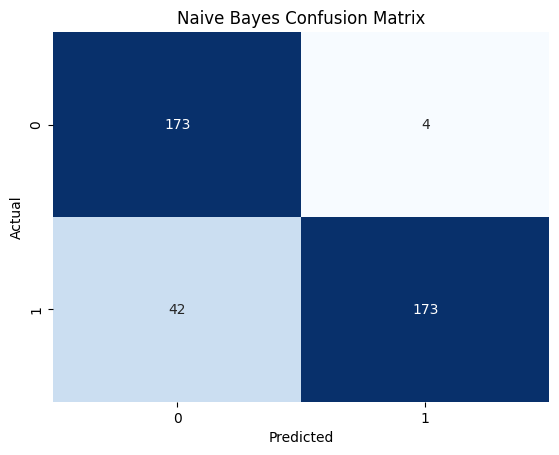



Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Not Spam       0.80      0.98      0.88       177
Spam Comment       0.98      0.80      0.88       215

    accuracy                           0.88       392
   macro avg       0.89      0.89      0.88       392
weighted avg       0.90      0.88      0.88       392





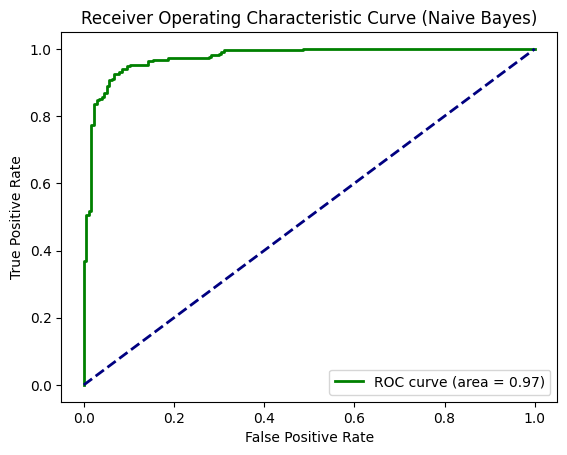

In [ ]:
# Naive Bayes algorithm
model_nb = BernoulliNB()
model_nb.fit(X_resampled, y_resampled)
print("Naive Bayes Score:", model_nb.score(xtest, ytest))

# Print accuracy
y_pred_nb = model_nb.predict(xtest)
print("Naive Bayes Accuracy:", accuracy_score(ytest, y_pred_nb))

# Print Cross-Validation Score
cv_scores_nb = cross_val_score(model_nb, x, y, cv=5)  # You can adjust the number of folds
print("Naive Bayes Cross-Validation Scores:", cv_scores_nb)
print("Mean Cross-Validation Score:", np.mean(cv_scores_nb))
print("\n")


# Predictions
sample = "Check this out: https://thecleverprogrammer.com/"
data = cv.transform([sample]).toarray()
print(model_nb.predict(data))

sample = "Lack of information!"
data = cv.transform([sample]).toarray()
print(model_nb.predict(data))

sample = "Check out my channel guys"
data = cv.transform([sample]).toarray()
print(model_nb.predict(data))

sample = "The video was so engaging and inspiring!"
data = cv.transform([sample]).toarray()
print(model_nb.predict(data))
print("\n")


# Print confusion matrix
print("Naive Bayes Confusion Matrix:")
# print(confusion_matrix(ytest, y_pred_nb))
cm = confusion_matrix(ytest, y_pred_nb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\n")


# Print additional evaluation metrics
print("Naive Bayes Classification Report:")
print(classification_report(ytest, y_pred_nb))
print("\n")


# Convert labels to binary (0 and 1)
ytest_binary = (ytest == 'Spam Comment').astype(int)

# Predict probabilities
y_probs_nb = model_nb.predict_proba(xtest)[:, 1]

# Calculate ROC curve
fpr_nb, tpr_nb, thresholds_nb = roc_curve(ytest_binary, y_probs_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Plot ROC curve for Naive Bayes
plt.figure()
plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_nb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (Naive Bayes)')
plt.legend(loc='lower right')
plt.show()

SVM: 0.9566326530612245
SVM: 0.9566326530612245
SVM Cross-Validation Scores: [0.88265306 0.93861893 0.95396419 0.95907928 0.93606138]
SVM Cross-Validation Score: 0.9340753692781462
['Spam Comment']
['Not Spam']
['Spam Comment']
['Not Spam']
SVM Matrix:


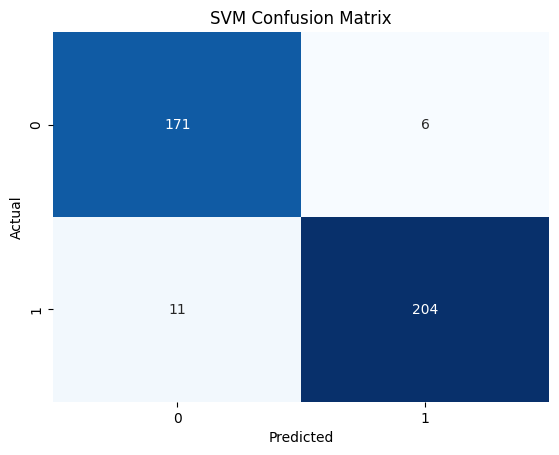

SVM Report:
              precision    recall  f1-score   support

    Not Spam       0.94      0.97      0.95       177
Spam Comment       0.97      0.95      0.96       215

    accuracy                           0.96       392
   macro avg       0.96      0.96      0.96       392
weighted avg       0.96      0.96      0.96       392





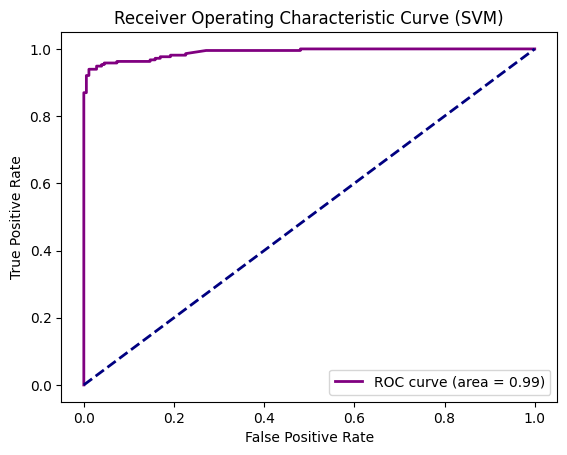

In [ ]:
# Support Vector Machine SVM
model_svm = SVC(kernel='linear', probability=True)
model_svm.fit(X_resampled, y_resampled)
print("SVM:", model_svm.score(xtest, ytest))

# Print accuracy
y_pred_svm = model_svm.predict(xtest)
print("SVM:", accuracy_score(ytest, y_pred_svm))

# Print Cross-Validation Score
cv_scores_svm = cross_val_score(model_svm, x, y, cv=5)  # You can adjust the number of folds
print("SVM Cross-Validation Scores:", cv_scores_svm)
print("SVM Cross-Validation Score:", np.mean(cv_scores_svm))


# Predictions
sample = "Check this out: https://thecleverprogrammer.com/"
data = cv.transform([sample]).toarray()
print(model_svm.predict(data))

sample = "Lack of information!"
data = cv.transform([sample]).toarray()
print(model_svm.predict(data))

sample = "Check out my channel guys"
data = cv.transform([sample]).toarray()
print(model_svm.predict(data))

sample = "The video was so engaging and inspiring!"
data = cv.transform([sample]).toarray()
print(model_svm.predict(data))


# Print confusion matrix
print("SVM Matrix:")
cm = confusion_matrix(ytest, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Print additional evaluation metrics
print("SVM Report:")
print(classification_report(ytest, y_pred_svm))
print("\n")


# Convert labels to binary (0 and 1)
ytest_binary = (ytest == 'Spam Comment').astype(int)

# Predict probabilities
y_probs_svm = model_svm.predict_proba(xtest)[:, 1]

# Calculate ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(ytest_binary, y_probs_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot ROC curve for Naive Bayes
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve (SVM)')
plt.legend(loc='lower right')
plt.show()
